In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

In [3]:
from os.path import dirname
dirPath = dirname(dirname(os.getcwd()))+"\TotalCleanedTest.csv"
dirPath

'c:\\Users\\David Fernandez\\Desktop\\cancerDataAnalysis\\TotalCleanedTest.csv'

In [4]:
df = pd.read_csv(dirPath)
df.head()

,Unnamed: 0,ent_regis,ent_regis_nm,mun_regis,mun_regis_nm,ent_resid,ent_resid_nm,mun_resid,mun_resid_nm,ent_ocurr,...,rel_emba,area_ur,complicaro,lengua,ICD,detailCaus,Organ,ICD_Mex,detailCaus_Mex,organ_Mex
0,0,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,...,8,1,8,9,C23,Tumor maligno de la vesícula biliar,Gallbladder,C16,Los demás tumores malignos de órganos digestivos,Stomach
1,1,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,...,2,1,2,9,C34,"Tumor maligno de los bronquios o del pulmón, p...",Lungs,C34,"Tumor maligno de la tráquea, de los bronquios ...",Lungs
2,2,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,...,8,1,8,9,C53,"Tumor maligno del cuello del útero, sin otra e...",Cervix Uteri,C53,Tumor maligno del cuello del útero,Cervix Uteri
3,3,1,Aguascalientes,5,Jesus Maria,1,Aguascalientes,5,Jesus Maria,1,...,8,1,8,9,C34,"Tumor maligno de los bronquios o del pulmón, p...",Lungs,C34,"Tumor maligno de la tráquea, de los bronquios ...",Lungs
4,4,1,Aguascalientes,8,San Jose de Gracia,1,Aguascalientes,8,San Jose de Gracia,1,...,8,2,8,9,C22,"Tumor maligno del hígado, no especificado",Liver,C22,Tumor maligno del hígado y de las vías biliare...,Liver


In [5]:
index_names = df[((df['anio_ocur'] == 99) | (df['mes_ocurr'] == 99)| (df['dia_ocurr'] == 99))].index
df.drop(index_names, inplace = True) 
#index_names = df[((df['anio_nacim'] == 99) | (df['mes_nacim'] == 99)| (df['dia_nacim'] == 99))].index
#df.drop(index_names, inplace = True) 
df.shape[0]

643922

In [6]:
gdl = df.loc[(df['ent_regis'] == 3)&(df['anio_ocur'] >= 2012)]
gdl.head()

,Unnamed: 0,ent_regis,ent_regis_nm,mun_regis,mun_regis_nm,ent_resid,ent_resid_nm,mun_resid,mun_resid_nm,ent_ocurr,...,rel_emba,area_ur,complicaro,lengua,ICD,detailCaus,Organ,ICD_Mex,detailCaus_Mex,organ_Mex
2731,2731,3,Baja California Sur,2,Mulege,3,Baja California Sur,2,Mulege,3,...,8,2,8,9,C16,"Tumor maligno del estómago, parte no especificada",Stomach,C16,Tumor maligno del estómago,Stomach
2732,2732,3,Baja California Sur,3,La Paz,3,Baja California Sur,3,La Paz,3,...,8,1,8,9,C71,"Tumor maligno del encéfalo, parte no especificada",Brain,C71,Tumor maligno del encéfalo,Brain
2735,2735,3,Baja California Sur,8,Los Cabos,3,Baja California Sur,8,Los Cabos,3,...,8,2,8,9,C34,"Tumor maligno de los bronquios o del pulmón, p...",Lungs,C34,"Tumor maligno de la tráquea, de los bronquios ...",Lungs
2736,2736,3,Baja California Sur,9,Loreto,3,Baja California Sur,9,Loreto,3,...,8,1,8,9,C96,Tumores malignos (primarios) de sitios múltipl...,Lymphoma,C999,Tumores malignos (primarios) de sitios múltipl...,Otros
2737,2737,3,Baja California Sur,9,Loreto,3,Baja California Sur,9,Loreto,3,...,8,1,8,9,C67,"Tumor maligno de la vejiga urinaria, parte no ...",Bladder,C67,Tumor maligno de la vejiga urinaria,Bladder


In [7]:
cols=["anio_ocur","mes_ocurr","dia_ocurr"]
gdl['date_ocurr'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
gdl['date_ocurr']=pd.to_datetime(gdl['date_ocurr'])

<ipython-input-7-fa9a23fd6293>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdl['date_ocurr'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
<ipython-input-7-fa9a23fd6293>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdl['date_ocurr']=pd.to_datetime(gdl['date_ocurr'])


In [8]:
gdl.head()

,Unnamed: 0,ent_regis,ent_regis_nm,mun_regis,mun_regis_nm,ent_resid,ent_resid_nm,mun_resid,mun_resid_nm,ent_ocurr,...,area_ur,complicaro,lengua,ICD,detailCaus,Organ,ICD_Mex,detailCaus_Mex,organ_Mex,date_ocurr
2731,2731,3,Baja California Sur,2,Mulege,3,Baja California Sur,2,Mulege,3,...,2,8,9,C16,"Tumor maligno del estómago, parte no especificada",Stomach,C16,Tumor maligno del estómago,Stomach,2012-01-21
2732,2732,3,Baja California Sur,3,La Paz,3,Baja California Sur,3,La Paz,3,...,1,8,9,C71,"Tumor maligno del encéfalo, parte no especificada",Brain,C71,Tumor maligno del encéfalo,Brain,2012-01-01
2735,2735,3,Baja California Sur,8,Los Cabos,3,Baja California Sur,8,Los Cabos,3,...,2,8,9,C34,"Tumor maligno de los bronquios o del pulmón, p...",Lungs,C34,"Tumor maligno de la tráquea, de los bronquios ...",Lungs,2012-01-26
2736,2736,3,Baja California Sur,9,Loreto,3,Baja California Sur,9,Loreto,3,...,1,8,9,C96,Tumores malignos (primarios) de sitios múltipl...,Lymphoma,C999,Tumores malignos (primarios) de sitios múltipl...,Otros,2012-01-04
2737,2737,3,Baja California Sur,9,Loreto,3,Baja California Sur,9,Loreto,3,...,1,8,9,C67,"Tumor maligno de la vejiga urinaria, parte no ...",Bladder,C67,Tumor maligno de la vejiga urinaria,Bladder,2012-01-05


In [9]:
yearCount = gdl['date_ocurr'].value_counts().rename_axis('unique_values').reset_index(name='counts')
#yearCount.set_index('unique_values', inplace=True)
yearCount = yearCount.sort_values(by=['unique_values'])
yearCount.set_index('unique_values', inplace = True)
yearCount

,counts
unique_values,
2012-01-01,1
2012-01-02,2
2012-01-03,1
2012-01-04,1
2012-01-05,1
...,...
2019-12-26,3
2019-12-27,1
2019-12-28,2


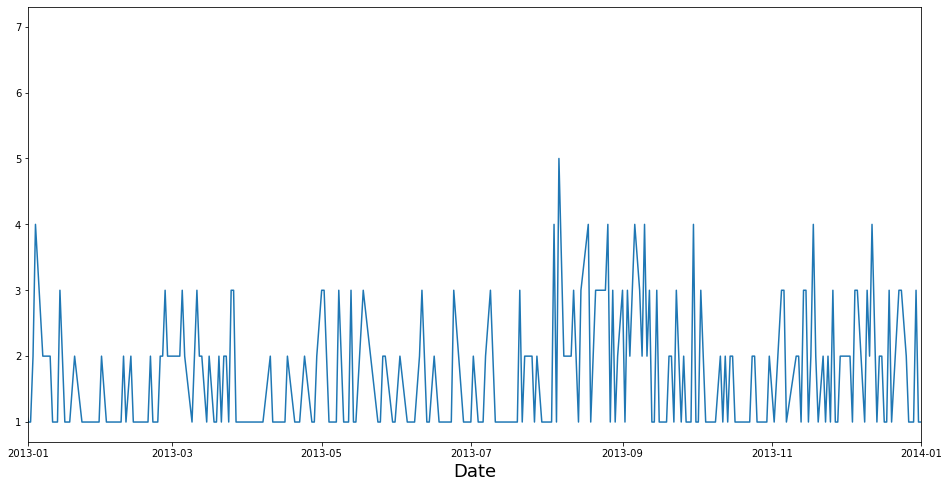

In [11]:
import datetime
plt.figure(figsize=(16,8))
plt.plot(yearCount['counts'])
plt.xlabel('Date',fontsize=18)
plt.xlim([datetime.date(2013, 1, 1), datetime.date(2014, 1, 1)])
plt.show()

In [1]:
filename = '\yearcount3.csv'
dirPath = dirname(os.getcwd())+"\RNN\YearlyTendencies" + filename
yearCount.to_csv(dirPath)

NameError: name 'dirname' is not defined

In [11]:
gdl['month-year'] = pd.to_datetime(gdl.anio_ocur.astype(str) + '-' + gdl.mes_ocurr.astype(str))
gdl.head()

<ipython-input-11-842fc2df9b05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdl['month-year'] = pd.to_datetime(gdl.anio_ocur.astype(str) + '-' + gdl.mes_ocurr.astype(str))


,Unnamed: 0,ent_regis,ent_regis_nm,mun_regis,mun_regis_nm,ent_resid,ent_resid_nm,mun_resid,mun_resid_nm,ent_ocurr,...,complicaro,lengua,ICD,detailCaus,Organ,ICD_Mex,detailCaus_Mex,organ_Mex,date_ocurr,month-year
65369,65369,30,Veracruz de Ignacio de la Llave,138,Rio Blanco,30,Veracruz de Ignacio de la Llave,125,Paso del Macho,30,...,8,2,C95,Leucemia linfoblástica aguda [LLA],Leukemia,C95,Leucemias,Leukemia,2012-01-05,2012-01-01
65370,65370,30,Veracruz de Ignacio de la Llave,138,Rio Blanco,30,Veracruz de Ignacio de la Llave,21,Atoyac,30,...,8,2,C96,"Linfoma no Hodgkin, no especificado",Lymphoma,C96,Linfoma no Hodgkin,Lymphoma,2012-01-15,2012-01-01
65371,65371,30,Veracruz de Ignacio de la Llave,138,Rio Blanco,30,Veracruz de Ignacio de la Llave,138,Rio Blanco,30,...,8,2,C25,Tumor maligno secundario de otros sitios espec...,Pancreas,C999,Los demás tumores malignos de otros sitios y l...,Otros,2012-01-16,2012-01-01
65372,65372,30,Veracruz de Ignacio de la Llave,138,Rio Blanco,30,Veracruz de Ignacio de la Llave,14,Amatlan de los Reyes,30,...,2,2,C96,"Linfoma no Hodgkin, no especificado",Lymphoma,C96,Linfoma no Hodgkin,Lymphoma,2012-01-17,2012-01-01
65373,65373,30,Veracruz de Ignacio de la Llave,138,Rio Blanco,30,Veracruz de Ignacio de la Llave,173,Tezonapa,30,...,8,2,C34,Lesión de sitios contiguos de los bronquios y ...,Lungs,C34,"Tumor maligno de la tráquea, de los bronquios ...",Lungs,2012-01-29,2012-01-01


In [13]:
yearCount2 = gdl['month-year'].value_counts().rename_axis('unique_values').reset_index(name='counts')
#yearCount.set_index('unique_values', inplace=True)
yearCount2 = yearCount2.sort_values(by=['unique_values'])
yearCount2.set_index('unique_values', inplace = True)
yearCount2

,counts
unique_values,
2012-01-01,538
2012-02-01,545
2012-03-01,551
2012-04-01,483
2012-05-01,520
...,...
2019-08-01,692
2019-09-01,722
2019-10-01,740


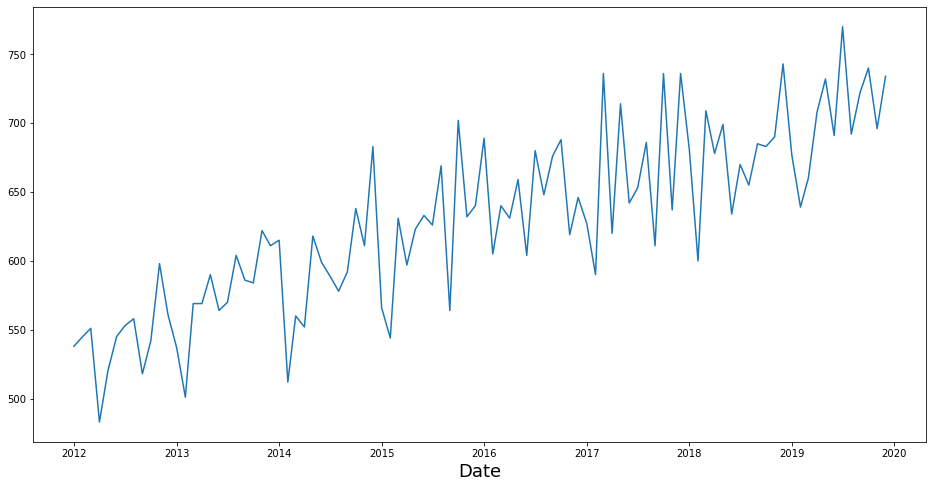

In [14]:
import datetime
plt.figure(figsize=(16,8))
plt.plot(yearCount2['counts'])
plt.xlabel('Date',fontsize=18)
plt.show()

In [15]:
filename = '\yearcount3.csv'
dirPath = dirname(os.getcwd())+"\RNN\YearlyTendencies" + filename
yearCount.to_csv(dirPath)